<a href="https://colab.research.google.com/github/PrajwalPrashanth/WidsDatathon2019/blob/master/WidsDatathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and downlaoding data

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!unzip '/content/gdrive/My Drive/widsdatathon/widsdatathon2019'
!unzip '/content/train_images'
!unzip '/content/leaderboard_test_data'
!unzip '/content/leaderboard_holdout_data'

Archive:  /content/gdrive/My Drive/widsdatathon/widsdatathon2019.zip
  inflating: train_images.zip        
  inflating: traininglabels.csv      
  inflating: SampleSubmission.csv    
  inflating: leaderboard_holdout_data.zip  
  inflating: leaderboard_test_data.zip  
Archive:  /content/train_images.zip
   creating: train_images/
  inflating: train_images/img_068062017.jpg  
  inflating: train_images/img_013962018.jpg  
  inflating: train_images/img_029652018.jpg  
  inflating: train_images/img_018402017.jpg  
  inflating: train_images/img_090232018.jpg  
  inflating: train_images/img_111972018.jpg  
  inflating: train_images/img_087662017.jpg  
  inflating: train_images/img_085292018.jpg  
  inflating: train_images/img_046872017.jpg  
  inflating: train_images/img_084512018.jpg  
  inflating: train_images/img_021842018.jpg  
  inflating: train_images/img_018502017.jpg  
  inflating: train_images/img_087762017.jpg  
  inflating: train_images/img_111872018.jpg  
  inflating: train_images

In [0]:
path = Path('/content')
train = 'train_images'
test =  path/'leaderboard_test_data'
holdout = path/'leaderboard_holdout_data'
sample = path/'SampleSubmission.csv'
labels = path/'traininglabels.csv'


In [0]:
labels_df = pd.read_csv(labels)
labels_df.head()

,image_id,has_oilpalm,score
0,img_000002017.jpg,0,0.7895
1,img_000012017.jpg,0,1.0000
2,img_000022017.jpg,0,1.0000
3,img_000072017.jpg,0,1.0000
4,img_000082017.jpg,0,1.0000


In [0]:
sample_df = pd.read_csv(sample)
sample_df.head()

,image_id,has_oilpalm
0,img_000012018.jpg,1
1,img_000022018.jpg,1
2,img_000032017.jpg,1
3,img_000042017.jpg,1
4,img_000052017.jpg,1


## EDA

In [0]:
len(labels_df['score'].unique()) #unique confidence scores

836

In [0]:
len(labels_df) #total

15244

In [0]:
len(labels_df[labels_df['score']<.9])

2521

In [0]:
len(labels_df[labels_df['score']<.75])

804

In [0]:
len(labels_df[labels_df['score']<.5])

105

In [0]:
a = labels_df[labels_df['has_oilpalm']==1]
a

,image_id,has_oilpalm,score
10233,img_039772018.jpg,1,1.0000
13449,img_087082018.jpg,1,1.0000
14538,img_102582018.jpg,1,1.0000
10159,img_038762018.jpg,1,1.0000
9870,img_034572018.jpg,1,1.0000
6730,img_098622017.jpg,1,0.6031
3636,img_052612017.jpg,1,1.0000
2688,img_038632017.jpg,1,1.0000
6721,img_098452017.jpg,1,0.8003
14869,img_107172018.jpg,1,1.0000


In [0]:
len(labels_df[labels_df['has_oilpalm']==0])

14302

In [0]:
len(labels_df[labels_df['has_oilpalm']==0][labels_df['score']<.5])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


83

In [0]:
len(labels_df[labels_df['has_oilpalm']==1][labels_df['score']<.5])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


22

In [0]:
len(labels_df[labels_df['score']>.9])

12723

## Datablock preparation, evaluation score

In [0]:
labels_df = labels_df.sample(frac=1, random_state=3)

In [0]:
test_names = [f for f in test.iterdir()]
holdout_names = [f for f in holdout.iterdir()]

In [0]:
a = labels_df[labels_df['has_oilpalm']==1][:25]
a

,image_id,has_oilpalm,score
72,img_001092017.jpg,1,0.3944
75,img_001132017.jpg,1,1.0000
109,img_001712017.jpg,1,0.7543
129,img_002012017.jpg,1,1.0000
143,img_002232017.jpg,1,1.0000
155,img_002402017.jpg,1,1.0000
176,img_002722017.jpg,1,1.0000
197,img_003012017.jpg,1,0.7920
203,img_003162017.jpg,1,1.0000
208,img_003222017.jpg,1,1.0000


In [0]:
src = (ImageItemList.from_df(labels_df, path, folder=train)
      .random_split_by_pct(0.2, seed=1)
      .label_from_df('has_oilpalm')
      .add_test(test_names+holdout_names))

In [0]:
data =  (src.transform(get_transforms(), size=256)
         .databunch(bs=32)
         .normalize(imagenet_stats))

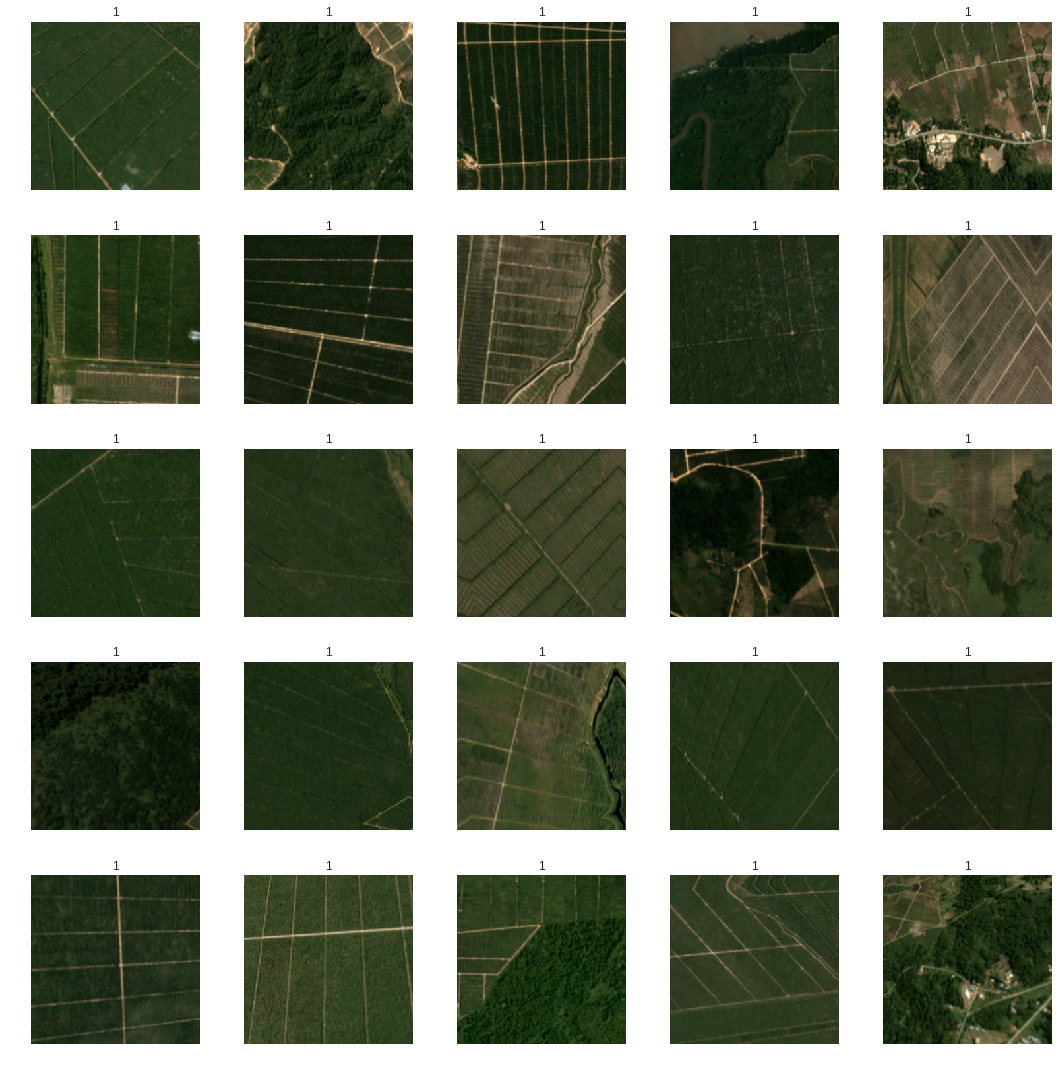

In [0]:
data.show_batch(rows=5, figsize=(15,15))

In [0]:
from sklearn.metrics import roc_auc_score
def auc_score(preds,targets):
    return torch.tensor(roc_auc_score(targets,preds[:,1]))

## Training

In [0]:
learn = create_cnn(data, models.densenet121, metrics=[accuracy, auc_score])

/usr/local/lib/python3.6/dist-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.torch/models/densenet161-8d451a50.pth
115730790it [00:01, 75878278.31it/s]


In [0]:
learn.lr_find()

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,auc_score


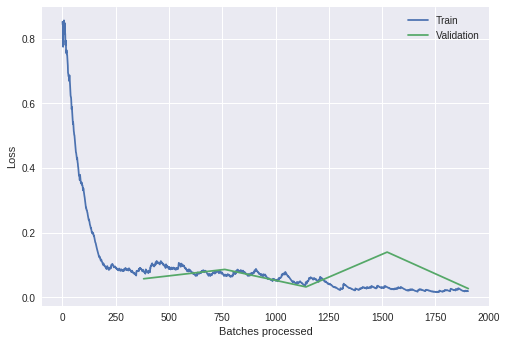

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(3, slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,auc_score
1,0.017562,0.025174,0.990486,0.998489
2,0.013781,0.024755,0.990157,0.998566
3,0.014015,0.024525,0.990486,0.998495


## Predictions

In [0]:
p,t = learn.get_preds(ds_type=DatasetType.Test)
p = to_np(p)
ids = np.array([f.name for f in (test_names+holdout_names)])
sub = pd.DataFrame(np.stack([ids, p[:,1]], axis=1), columns=sample_df.columns)
sub.to_csv('d161_f5.csv', index=False)